# GRIP : The Spark Foundation

### Data Science Business Analytics Intern - November, 2022 [#GRIPNOV22]

### Author : Varsha S Thambi

### TASK 6 : Prediction using Decision Tree Algorithm

Create the Decision Tree Classifier and visualize it graphically, and to check whether if we feed any a new data, it would predict the right class accordingly or not.

### Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

#import Decision Tree classifier library from sklearn
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv(r"C:\Users\varsh\OneDrive\Desktop\Iris.csv")

In [3]:
df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploring Data

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# Check if an invoice number is missing
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no null value in the given data set.

In [7]:
# To find the number of rows and columns
df.shape

(150, 6)

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# To find more information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
# Now we will drop id
iris=pd.DataFrame(df)
iris=iris.drop(columns=["Id"])
iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Visualization

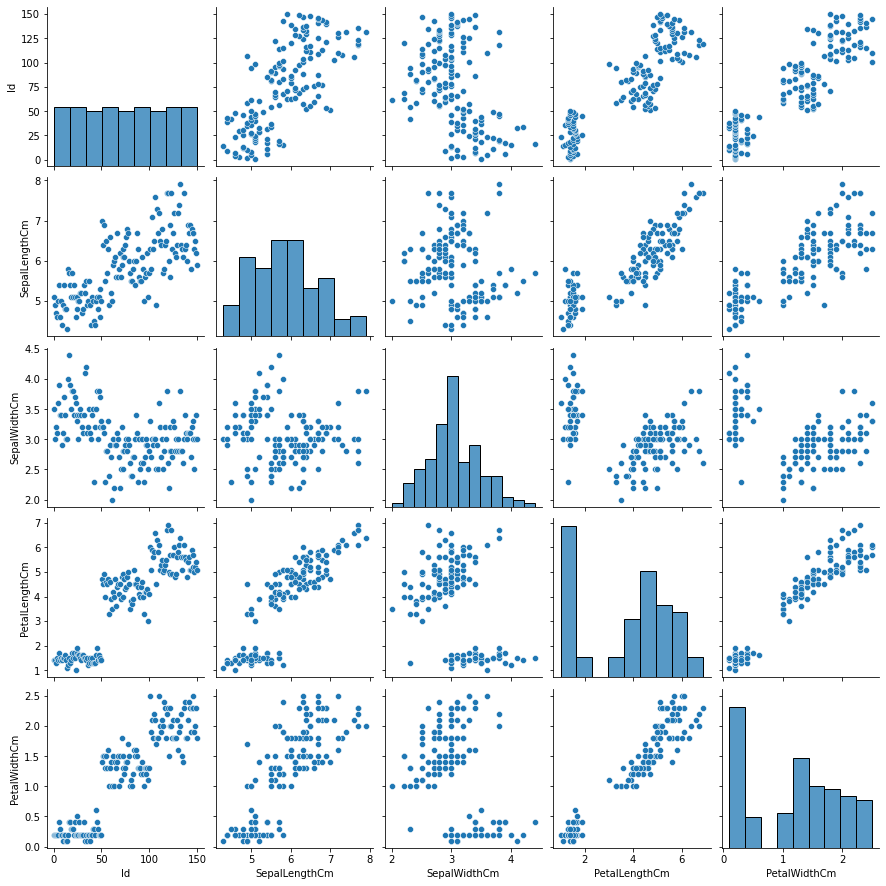

In [13]:
# Input data visualization
sns.pairplot(df)

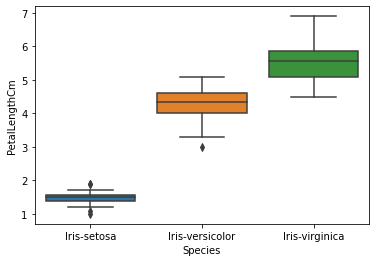

In [14]:
sns.boxplot(x="Species",y="PetalLengthCm",data=iris)
plt.show()

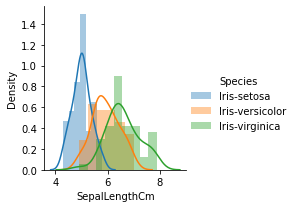

In [15]:
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

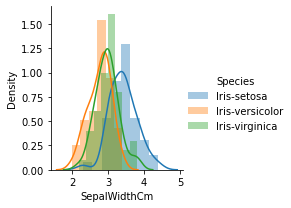

In [16]:
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"SepalWidthCm").add_legend()
plt.show()

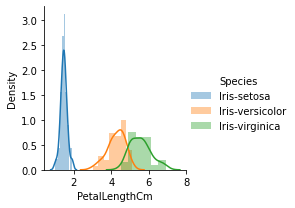

In [17]:
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
plt.show()

In [18]:
from sklearn import preprocessing
df['Species']=preprocessing.LabelEncoder().fit_transform(df['Species'])

In [19]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

### Split dependent and Independent data

In [20]:
x=df.iloc[:,1:5].values
y=df.iloc[:,-1].values

### Decison Tree model training

In [21]:
# split data into train and test

from sklearn.model_selection import train_test_split

xtrain,xtest, ytrain, ytest = train_test_split(x, y,train_size=0.7,test_size = 0.3, 
                                               random_state=0)


In [22]:
# import Decision Tree classifier library from sklearn
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Create model object
dtree=DecisionTreeClassifier(max_depth=5)

In [24]:
# Fit the training model
model=dtree.fit(xtrain,ytrain)

In [25]:
# Test the accuracy of training model
dtree.score(xtrain,ytrain)

1.0

In [26]:
# Test the model using xtest
y_pred=model.predict(xtest)

Training complete

### Comparing actual and predicted classification

In [27]:
df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


### Let us visualize the Decision Tree

In [28]:
# import  Tree classifier library from sklearn
from sklearn import tree
classifier_tree=tree.DecisionTreeClassifier()
classifier_tree=classifier_tree.fit(xtrain,ytrain)

In [29]:
# text graph representation
text_representation=tree.export_text(classifier_tree)
print(text_representation)

|--- feature_3 <= 0.75
|   |--- class: 0
|--- feature_3 >  0.75
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



[Text(0.4, 0.9, 'X[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'X[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

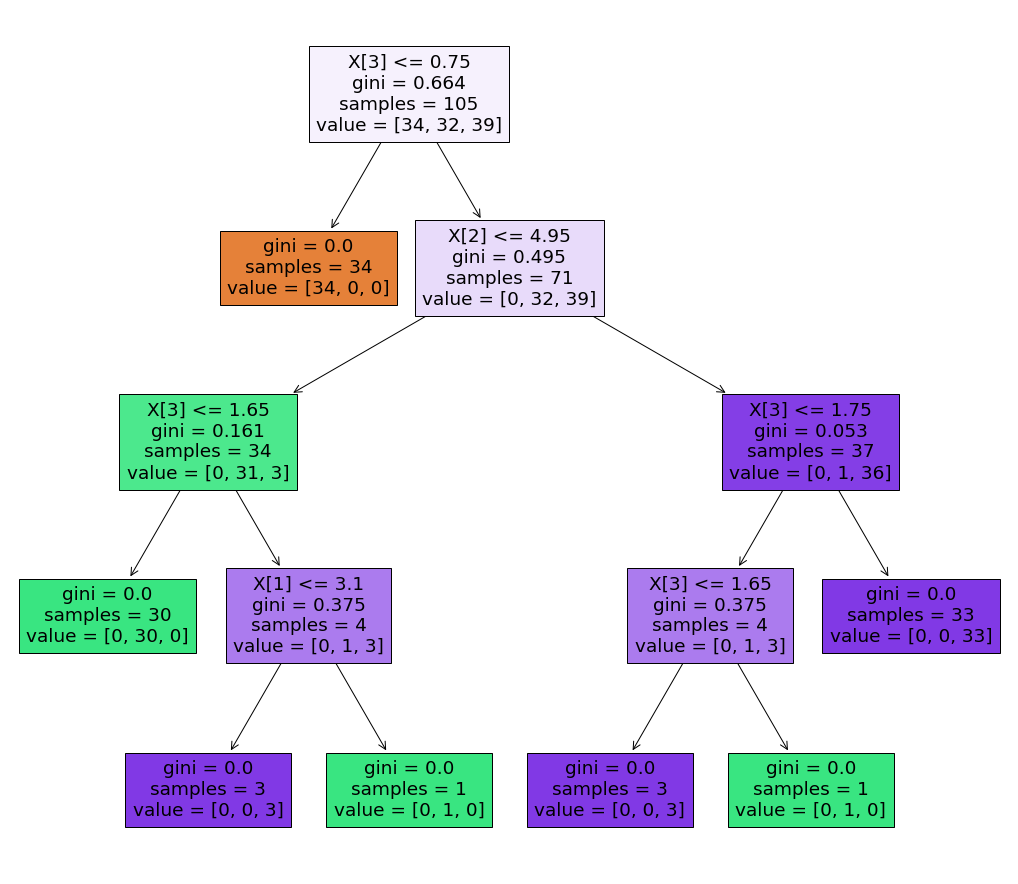

In [30]:
# Decision tree plot
plt.figure(figsize=(18,16))
tree.plot_tree(classifier_tree,filled=True,impurity=True)

### Accuracy of our model

In [31]:
# Check accuracy ot test model
dtree.score(xtest,ytest)

0.9777777777777777

### Making the Confusion Matrix

In [32]:
# Import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix ,accuracy_score

In [33]:
cm=confusion_matrix(ytest,y_pred)
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


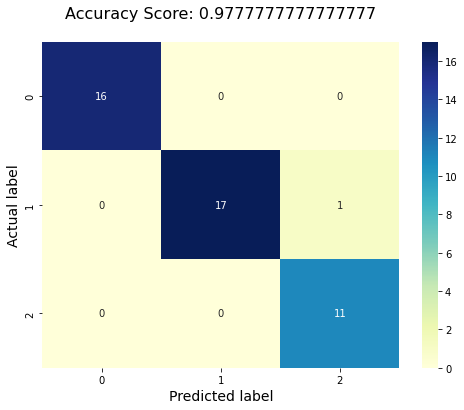

In [37]:
# Plot Confusion matrix

score=np.mean(y_pred==ytest)
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap="YlGnBu", annot=True) #YlGnBu
plt.title('Accuracy Score: {}\n'.format(score),size=16)
plt.xlabel('Predicted label',fontsize=14)
plt.ylabel('Actual label',fontsize=14)
plt.show()

In [34]:
cm_accuracy=accuracy_score(ytest,y_pred)
print("Acuuracy of model : ",cm_accuracy)

Acuuracy of model :  0.9777777777777777


### Classification_report

In [35]:
from sklearn import metrics
print(metrics.classification_report(ytest,model.predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Conclusion

This Clssifier Model can predict the species of the flower with 97% accuracy score.